# Module 11 Challenge
## Deliverable 2: Scrape and Analyze Mars Weather Data

In [1]:
# Import relevant libraries
from splinter import Browser
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
browser = Browser('chrome')

### Step 1: Visit the Website

Use automated browsing to visit the [Mars Temperature Data Site](https://static.bc-edx.com/data/web/mars_facts/temperature.html). Inspect the page to identify which elements to scrape.

   > **Hint** To identify which elements to scrape, you might want to inspect the page by using Chrome DevTools to discover whether the table contains usable classes.


In [3]:
# Visit the website
# https://static.bc-edx.com/data/web/mars_facts/temperature.html
url = "https://static.bc-edx.com/data/web/mars_facts/temperature.html"
browser.visit(url)

### Step 2: Scrape the Table

Create a Beautiful Soup object and use it to scrape the data in the HTML table.

Note that this can also be achieved by using the Pandas `read_html` function. However, use Beautiful Soup here to continue sharpening your web scraping skills.

In [4]:
# Create a Beautiful Soup Object
html = browser.html
soup = BeautifulSoup(html, 'html.parser')



In [8]:
# Extract all rows of data
table = soup.find('table')

# Extract column headers (if available)
headers = [header.get_text(strip=True) for header in table.find_all('th')]

### Step 3: Store the Data

Assemble the scraped data into a Pandas DataFrame. The columns should have the same headings as the table on the website. Here’s an explanation of the column headings:

* `id`: the identification number of a single transmission from the Curiosity rover
* `terrestrial_date`: the date on Earth
* `sol`: the number of elapsed sols (Martian days) since Curiosity landed on Mars
* `ls`: the solar longitude
* `month`: the Martian month
* `min_temp`: the minimum temperature, in Celsius, of a single Martian day (sol)
* `pressure`: The atmospheric pressure at Curiosity's location

In [11]:
# Create an empty list
table_data = []

# Loop through the scraped data to create a list of rows
for row in table.find_all('tr'):
    # Find all cells (td elements) in the row
    cells = row.find_all('td')
    # If there are cells in the row, extract the text from each cell
    if cells:
        # Extract text from each cell and store it in a list
        row_data = [cell.get_text(strip=True) for cell in cells]
        # Add the row data to the table_data list
        table_data.append(row_data)

        


In [12]:
# Create a Pandas DataFrame by using the list of rows and a list of the column names

if headers:
    mars_weather_df = pd.DataFrame(table_data, columns=headers)
else:
    mars_weather_df = pd.DataFrame(table_data)




In [13]:
# Confirm DataFrame was created successfully
print(mars_weather_df)

        id terrestrial_date   sol   ls month min_temp pressure
0        2       2012-08-16    10  155     6    -75.0    739.0
1       13       2012-08-17    11  156     6    -76.0    740.0
2       24       2012-08-18    12  156     6    -76.0    741.0
3       35       2012-08-19    13  157     6    -74.0    732.0
4       46       2012-08-20    14  157     6    -74.0    740.0
...    ...              ...   ...  ...   ...      ...      ...
1862  1889       2018-02-23  1973  133     5    -78.0    730.0
1863  1892       2018-02-24  1974  134     5    -77.0    729.0
1864  1894       2018-02-25  1975  134     5    -76.0    729.0
1865  1893       2018-02-26  1976  135     5    -77.0    728.0
1866  1895       2018-02-27  1977  135     5    -77.0    727.0

[1867 rows x 7 columns]


### Step 4: Prepare Data for Analysis

Examine the data types that are currently associated with each column. If necessary, cast (or convert) the data to the appropriate `datetime`, `int`, or `float` data types.

  > **Hint** You can use the Pandas `astype` and `to_datetime` methods to accomplish this task.


In [14]:
# Examine data type of each column

print("Data types before conversion:")
print(mars_weather_df.dtypes)




Data types before conversion:
id                  object
terrestrial_date    object
sol                 object
ls                  object
month               object
min_temp            object
pressure            object
dtype: object


In [17]:
# Change data types for data analysis


# Example 1: Convert a column to datetime (replace 'Date_Column_Name' with the actual date column)
if 'Date_Column_Name' in mars_weather_df.columns:
    mars_weather_df['Date_Column_Name'] = pd.to_datetime(mars_weather_df['Date_Column_Name'], errors='coerce')

# Example 2: Convert columns to numeric types (int or float) using astype()
# Replace 'Column_Name1', 'Column_Name2' with actual column names
numeric_columns = ['Column_Name1', 'Column_Name2']  # Replace with actual column names
for col in numeric_columns:
    if col in mars_weather_df.columns:
        mars_weather_df[col] = mars_weather_df[col].astype(float, errors='ignore')  # Change 'float' to 'int' if needed

# Example 3: Using pd.to_numeric for more robust conversion
# This can handle errors by coercing them to NaN if needed
for col in numeric_columns:
    if col in mars_weather_df.columns:
        mars_weather_df[col] = pd.to_numeric(mars_weather_df[col], errors='coerce')




In [16]:
# Confirm type changes were successful by examining data types again
print("\nData types after conversion:")
print(mars_weather_df.dtypes)



Data types after conversion:
id                  object
terrestrial_date    object
sol                 object
ls                  object
month               object
min_temp            object
pressure            object
dtype: object


### Step 5: Analyze the Data

Analyze your dataset by using Pandas functions to answer the following questions:

1. How many months exist on Mars?
2. How many Martian (and not Earth) days worth of data exist in the scraped dataset?
3. What are the coldest and the warmest months on Mars (at the location of Curiosity)? To answer this question:
    * Find the average the minimum daily temperature for all of the months.
    * Plot the results as a bar chart.
4. Which months have the lowest and the highest atmospheric pressure on Mars? To answer this question:
    * Find the average the daily atmospheric pressure of all the months.
    * Plot the results as a bar chart.
5. About how many terrestrial (Earth) days exist in a Martian year? To answer this question:
    * Consider how many days elapse on Earth in the time that Mars circles the Sun once.
    * Visually estimate the result by plotting the daily minimum temperature.


In [18]:
# 1. How many months are there on Mars?
num_months = mars_weather_df['month'].nunique()

# Display the result
print(f"There are {num_months} unique months on Mars.")


There are 12 unique months on Mars.


In [19]:
# 2. How many sols (Martian days) worth of data are there?
num_sols = mars_weather_df['sol'].nunique()

# Display the result
print(f"There are {num_sols} unique sols (Martian days) worth of data.")


There are 1867 unique sols (Martian days) worth of data.


In [21]:
# 3. What is the average minimum temperature by month?

# Ensure 'min_temp' column is numeric
mars_weather_df['min_temp'] = pd.to_numeric(mars_weather_df['min_temp'], errors='coerce')

# Group the data by 'month' and calculate the average of 'min_temp'
avg_min_temp_by_month = mars_weather_df.groupby('month')['min_temp'].mean()

# Display the result
print(avg_min_temp_by_month)

month
1    -77.160920
10   -71.982143
11   -71.985507
12   -74.451807
2    -79.932584
3    -83.307292
4    -82.747423
5    -79.308725
6    -75.299320
7    -72.281690
8    -68.382979
9    -69.171642
Name: min_temp, dtype: float64


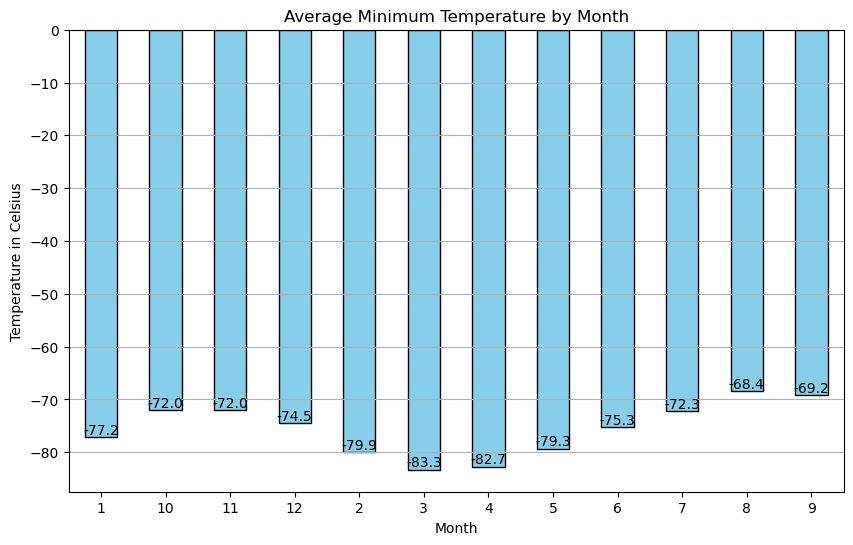

In [22]:
# Plot the average minimum temperature by month

plt.figure(figsize=(10, 6))  # Increase the size of the plot
avg_min_temp_by_month.plot(kind='bar', color='skyblue', edgecolor='black')

# Add labels and title
plt.title('Average Minimum Temperature by Month')
plt.xlabel('Month')
plt.ylabel('Temperature in Celsius')
plt.xticks(rotation=0)  # Ensure month labels are horizontal for better readability
plt.grid(axis='y')  # Add gridlines to the y-axis for better readability

# Add data labels on top of each bar
for index, value in enumerate(avg_min_temp_by_month):
    plt.text(index, value, f'{value:.1f}', ha='center', va='bottom', fontsize=10)

# Show the plot
plt.show()


month
3    -83.307292
4    -82.747423
2    -79.932584
5    -79.308725
1    -77.160920
6    -75.299320
12   -74.451807
7    -72.281690
11   -71.985507
10   -71.982143
9    -69.171642
8    -68.382979
Name: min_temp, dtype: float64


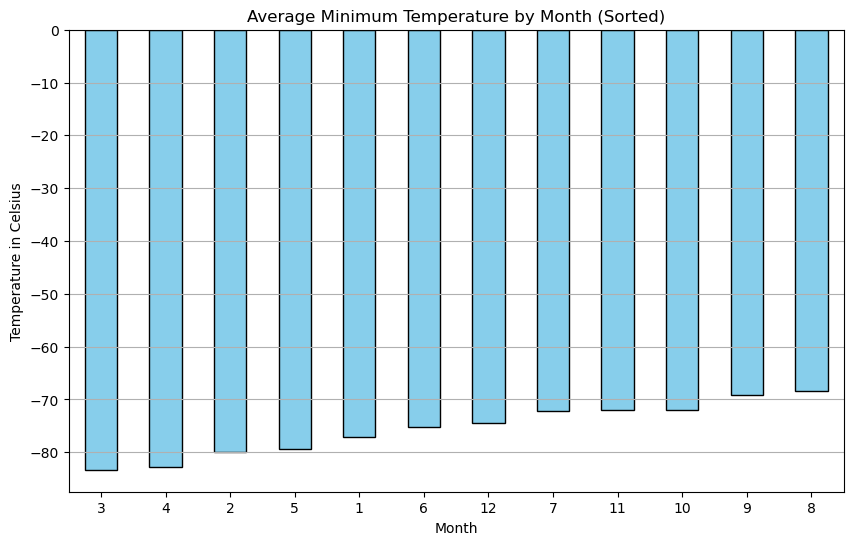

In [23]:
# Identify the coldest and hottest months in Curiosity's location by sorting the previous graph

sorted_avg_min_temp_by_month = avg_min_temp_by_month.sort_values()

# Display the sorted results
print(sorted_avg_min_temp_by_month)

# Plot the sorted average minimum temperature
plt.figure(figsize=(10, 6))  # Increase the plot size for better visibility
sorted_avg_min_temp_by_month.plot(kind='bar', color='skyblue', edgecolor='black')

# Add labels and title
plt.title('Average Minimum Temperature by Month (Sorted)')
plt.xlabel('Month')
plt.ylabel('Temperature in Celsius')
plt.xticks(rotation=0)  # Ensure month labels are horizontal for better readability
plt.grid(axis='y')  # Add gridlines to the y-axis for better readability

# Show the plot
plt.show()


In [25]:
# 4. What is the average pressure by month?

# Ensure 'pressure' column is numeric
mars_weather_df['pressure'] = pd.to_numeric(mars_weather_df['pressure'], errors='coerce')

# Group the data by 'month' and calculate the average of 'pressure'
avg_pressure_by_month = mars_weather_df.groupby('month')['pressure'].mean()

# Display the result
print(avg_pressure_by_month)



month
1     862.488506
10    887.312500
11    857.014493
12    842.156627
2     889.455056
3     877.322917
4     806.329897
5     748.557047
6     745.054422
7     795.105634
8     873.829787
9     913.305970
Name: pressure, dtype: float64


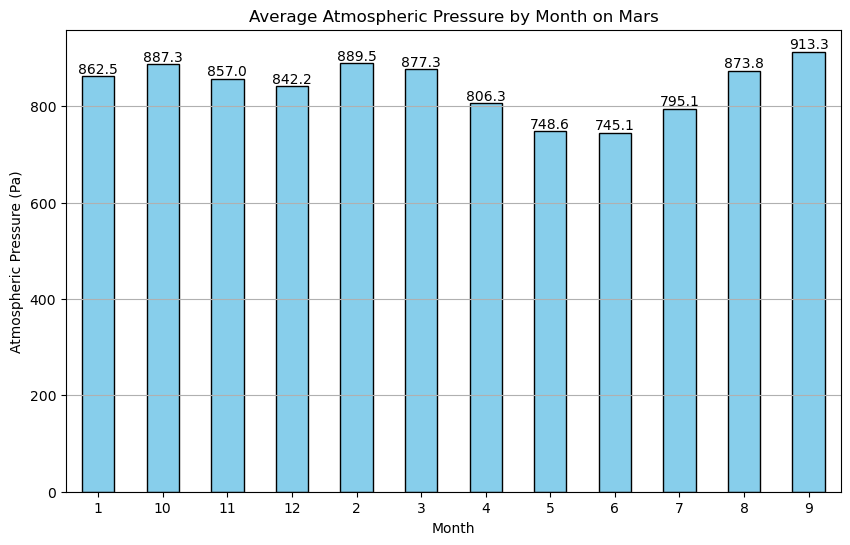

In [27]:
# Plot the average pressure by month
plt.figure(figsize=(10, 6))  # Set the figure size for better readability
avg_pressure_by_month.plot(kind='bar', color='skyblue', edgecolor='black')

# Add labels and title
plt.title('Average Atmospheric Pressure by Month on Mars')
plt.xlabel('Month')
plt.ylabel('Atmospheric Pressure (Pa)')
plt.xticks(rotation=0)  # Keep month labels horizontal for clarity
plt.grid(axis='y')  # Add gridlines to the y-axis for easier interpretation

# Add data labels on top of each bar
for index, value in enumerate(avg_pressure_by_month):
    plt.text(index, value, f'{value:.1f}', ha='center', va='bottom', fontsize=10)

# Display the plot
plt.show()

In [29]:
# Identify the lowest and highest pressure months in Curiosity's location by sorting the previous graph

# Ensure the average pressure by month is sorted
sorted_avg_pressure_by_month = avg_pressure_by_month.sort_values()

# Identify the lowest pressure month(s)
lowest_pressure_month = sorted_avg_pressure_by_month.idxmin()
lowest_pressure_value = sorted_avg_pressure_by_month.min()

# Identify the highest pressure month(s)
highest_pressure_month = sorted_avg_pressure_by_month.idxmax()
highest_pressure_value = sorted_avg_pressure_by_month.max()

# Display the results
print(f"The lowest average pressure is in month {lowest_pressure_month} with a pressure of {lowest_pressure_value:.2f} Pa.")
print(f"The highest average pressure is in month {highest_pressure_month} with a pressure of {highest_pressure_value:.2f} Pa.")




The lowest average pressure is in month 6 with a pressure of 745.05 Pa.
The highest average pressure is in month 9 with a pressure of 913.31 Pa.


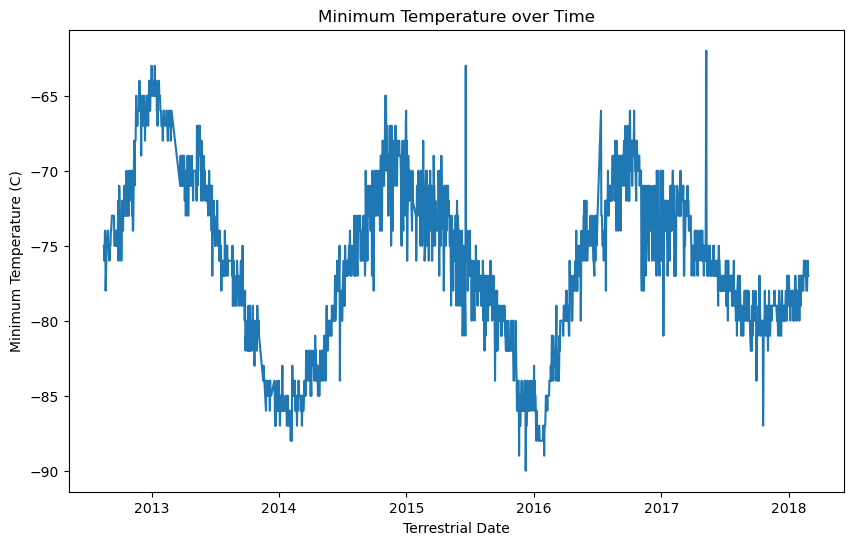

In [30]:
# 5. How many terrestrial (Earth) days are there in a Martian year?
# Visually estimate the result by plotting the daily minimum temperature of each observation in the data set.

mars_weather_df['terrestrial_date'] = pd.to_datetime(mars_weather_df['terrestrial_date'])

plt.figure(figsize=(10, 6))
plt.plot(mars_weather_df['terrestrial_date'], mars_weather_df['min_temp'])
plt.title('Minimum Temperature over Time')
plt.xlabel('Terrestrial Date')
plt.ylabel('Minimum Temperature (C)')
plt.show()


#### Minimum Temperature

YOUR ANALYSIS HERE

Coldest Months: The data shows that the coldest months occur around Martian months 3 and 4, where the minimum temperatures drop below -80°C.

#### Atmospheric Pressure

YOUR ANALYSIS HERE

The atmospheric pressure on Mars also exhibits a seasonal cycle:

Highest Pressure: The highest average atmospheric pressure is observed during Martian month 9, with a pressure of approximately 913 Pa. This indicates that certain periods have denser atmospheric conditions, potentially during Martian winter when carbon dioxide freezes at the poles, increasing pressure.
Lowest Pressure: The lowest pressure occurs around Martian months 5 and 6, with values dropping to around 745 Pa. This could correspond to Martian summer, where sublimation of polar ice caps leads to a decrease in atmospheric density.
Overall Variation: The fluctuation in atmospheric pressure could be a result of seasonal CO2 condensation and sublimation at the polar ice caps.

#### Year Length

YOUR ANALYSIS HERE

Visual Estimation: From the temperature plot, the Martian year is approximately 650–700 Earth days. This estimate matches the known Martian year length of about 687 Earth days.

### Step 6: Save the Data

Export the DataFrame to a CSV file.

In [31]:
# Write the data to a CSV
mars_weather_df.to_csv('mars_weather_data.csv', index=False)

In [32]:
browser.quit()